<a href="https://colab.research.google.com/github/davidzeng21/ddls-2024/blob/main/ddls_2024_module_1_computer_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello, World!")


Hello, World!


In [ ]:
import numpy as np

# Create a 1D array
array = np.array([1, 2, 3, 4, 5])

# Perform an operation: addition
result = array + 5
print(result)


[ 6  7  8  9 10]


In [ ]:
array_1 = np.array([6,7,8,9,10])

result_1 = array_1 -5
print(result_1)

[1 2 3 4 5]


In [ ]:
import torch

# Check PyTorch version
print(torch.__version__)


2.4.0+cu121


In [ ]:
# Create a 1D tensor
tensor_a = torch.tensor([1, 2, 3, 4, 5])

# Perform an operation: addition
tensor_b = tensor_a + 5
print(tensor_b)


tensor([ 6,  7,  8,  9, 10])


In [ ]:
# Convert a NumPy array to a PyTorch tensor
numpy_array = np.array([10, 20, 30, 40, 50])
tensor_from_numpy = torch.from_numpy(numpy_array)

# Convert a PyTorch tensor back to a NumPy array
numpy_from_tensor = tensor_from_numpy.numpy()

print(f"Tensor: {tensor_from_numpy}")
print(f"NumPy Array: {numpy_from_tensor}")


Tensor: tensor([10, 20, 30, 40, 50])
NumPy Array: [10 20 30 40 50]


In [ ]:
tensor_c = torch.tensor([11,22,33,44,55])

tensor_d = tensor_c + 5

array_d = tensor_d.numpy()

print(array_d)

[16 27 38 49 60]


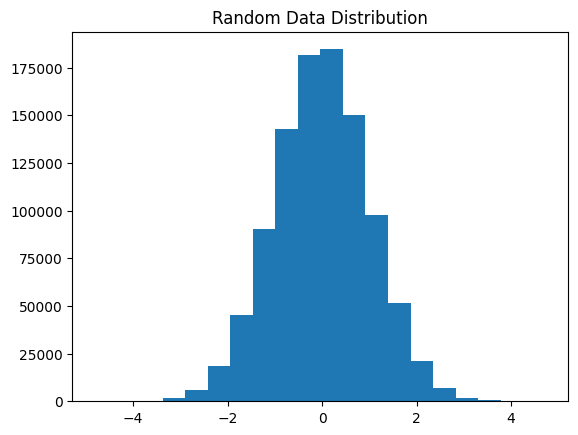

Mean: -0.0008274825755428609, Median: -0.0012294403469439753, Standard Deviation: 1.0003438864993277


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data
data = np.random.randn(10**6)

# Perform basic analysis
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)

# Plot the data
plt.hist(data, bins=20)
plt.title('Random Data Distribution')
plt.show()

print(f"Mean: {mean}, Median: {median}, Standard Deviation: {std_dev}")


# Topic 5: Supervised Learning - Regression Analysis

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

# Generate synthetic data
np.random.seed(0)
torch.manual_seed(0)

# Features
X = np.linspace(0, 10, 100).reshape(-1, 1)
# Linear relation: y = 2*X + noise
y = 2 * X + np.random.normal(0, 1, X.shape)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)


In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Initialize the model, loss function, and optimizer
model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [ ]:
# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 1.0087
Epoch [200/1000], Loss: 1.0084
Epoch [300/1000], Loss: 1.0084
Epoch [400/1000], Loss: 1.0083
Epoch [500/1000], Loss: 1.0083
Epoch [600/1000], Loss: 1.0083
Epoch [700/1000], Loss: 1.0083
Epoch [800/1000], Loss: 1.0083
Epoch [900/1000], Loss: 1.0083
Epoch [1000/1000], Loss: 1.0083


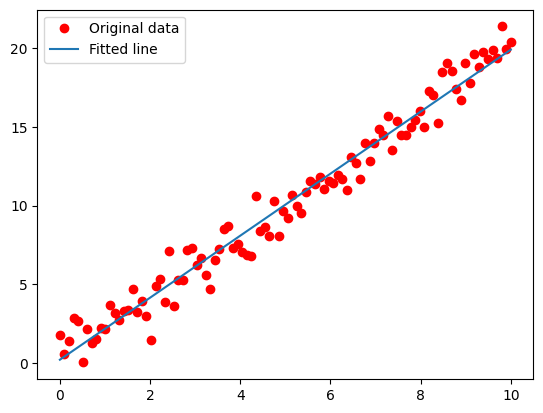

In [ ]:
import matplotlib.pyplot as plt

# Predicted values
predicted = model(X_tensor).detach().numpy()

# Plot
plt.plot(X, y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()


## Learning Rate Schedulers in PyTorch

In [ ]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(0)
torch.manual_seed(0)

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 2 * X + np.random.normal(0, 1, X.shape)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define the model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Start with a higher learning rate


In [ ]:
# StepLR scheduler: Decay the learning rate by a factor of 0.1 every 100 epochs
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)


In [ ]:
# Training loop
epochs = 500
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Step the scheduler
    scheduler.step()

    # Print out the learning rate and loss
    if (epoch+1) % 50 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, LR: {scheduler.get_last_lr()[0]:.6f}')


Epoch [50/500], Loss: 1.0666, LR: 0.000000
Epoch [100/500], Loss: 1.0437, LR: 0.000000
Epoch [150/500], Loss: 1.0299, LR: 0.000000
Epoch [200/500], Loss: 1.0214, LR: 0.000000
Epoch [250/500], Loss: 1.0163, LR: 0.000000
Epoch [300/500], Loss: 1.0132, LR: 0.000000
Epoch [350/500], Loss: 1.0113, LR: 0.000000
Epoch [400/500], Loss: 1.0101, LR: 0.000000
Epoch [450/500], Loss: 1.0094, LR: 0.000000
Epoch [500/500], Loss: 1.0090, LR: 0.000000


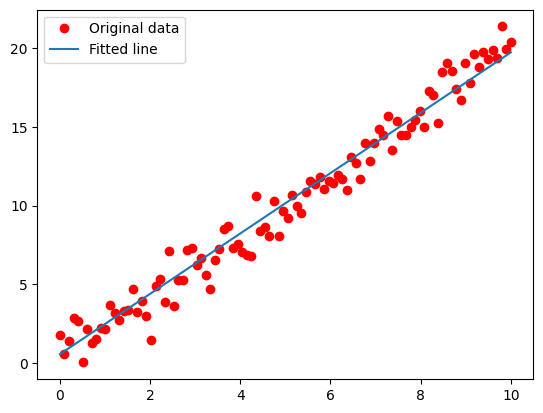

In [ ]:
# Predicted values
predicted = model(X_tensor).detach().numpy()

# Plot
plt.plot(X, y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()


# Topic 6: Supervised Learning - Classification

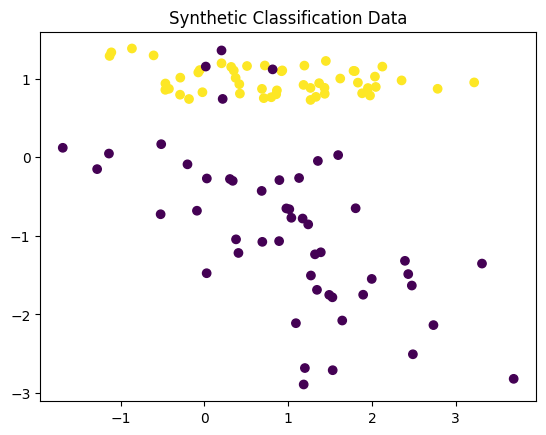

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic data
np.random.seed(0)
torch.manual_seed(0)

X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=2)
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

# Plotting the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Synthetic Classification Data')
plt.show()


In [ ]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(2, 4)
        self.layer2 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


In [ ]:
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    outputs = model(X_tensor)
    loss = criterion(outputs, y_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 0.6668
Epoch [200/1000], Loss: 0.6249
Epoch [300/1000], Loss: 0.5658
Epoch [400/1000], Loss: 0.4917
Epoch [500/1000], Loss: 0.4174
Epoch [600/1000], Loss: 0.3559
Epoch [700/1000], Loss: 0.3112
Epoch [800/1000], Loss: 0.2799
Epoch [900/1000], Loss: 0.2580
Epoch [1000/1000], Loss: 0.2421


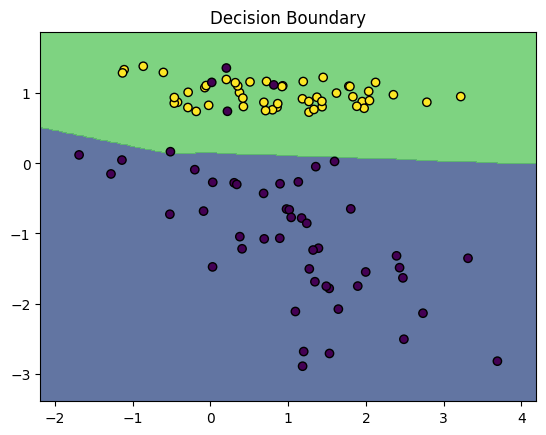

In [ ]:
# Plotting decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid).reshape(xx.shape)
        Z = Z > 0.5
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title('Decision Boundary')
    plt.show()

plot_decision_boundary(model, X, y)


In [ ]:
# Calculate accuracy
with torch.no_grad():  # No need to track gradients for evaluation
    predictions = model(X_tensor)
    predicted_classes = (predictions > 0.5).float()  # Convert probabilities to binary class labels
    accuracy = (predicted_classes == y_tensor).float().mean()

print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9500


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Convert tensors to NumPy arrays for sklearn metrics
y_true = y_tensor.numpy()
y_pred = predicted_classes.numpy()

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 0.9091
Recall: 1.0000
F1 Score: 0.9524


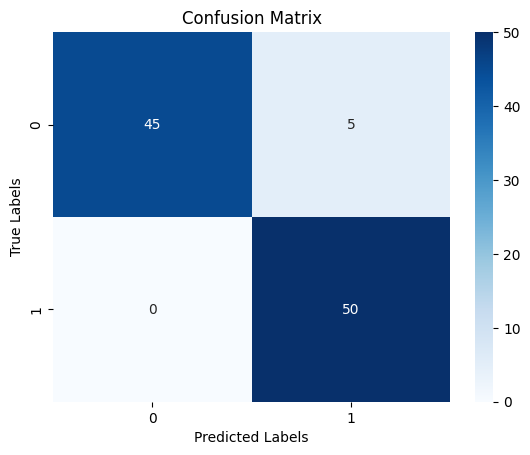

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


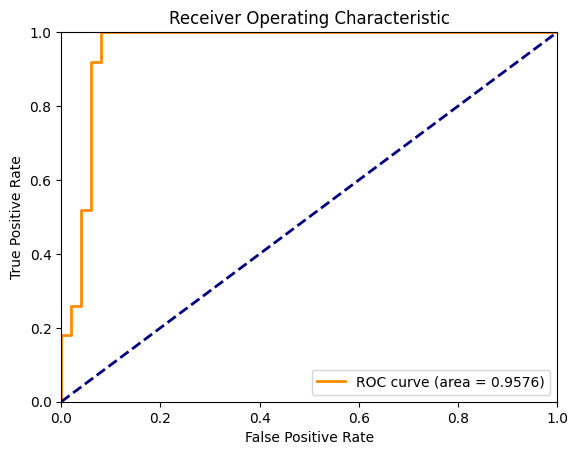

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, predictions.numpy())
roc_auc = roc_auc_score(y_true, predictions.numpy())

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def train_and_evaluate(model, criterion, optimizer, train_idx, val_idx):
    # Split the data
    X_train, X_val = X_tensor[train_idx], X_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

    # Training loop
    epochs = 500
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_preds = (val_outputs > 0.5).float()
        accuracy = accuracy_score(y_val, val_preds)
    model.train()

    return accuracy

# Set up k-fold cross-validation
k_folds = 10
kf = KFold(n_splits=k_folds, shuffle=True, random_state=0)

accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_tensor)):
    print(f'Fold {fold+1}/{k_folds}')

    # Initialize a new model instance for each fold
    model = SimpleNN()
    criterion = nn.BCELoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    # Train and evaluate
    accuracy = train_and_evaluate(model, criterion, optimizer, train_idx, val_idx)
    accuracies.append(accuracy)

    print(f'Accuracy for fold {fold+1}: {accuracy:.4f}')

# Average accuracy across all folds
mean_accuracy = np.mean(accuracies)
print(f'Mean accuracy across {k_folds} folds: {mean_accuracy:.4f}')


Fold 1/10
Accuracy for fold 1: 1.0000
Fold 2/10
Accuracy for fold 2: 0.9000
Fold 3/10
Accuracy for fold 3: 0.9000
Fold 4/10
Accuracy for fold 4: 0.9000
Fold 5/10
Accuracy for fold 5: 0.8000
Fold 6/10
Accuracy for fold 6: 0.9000
Fold 7/10
Accuracy for fold 7: 0.9000
Fold 8/10
Accuracy for fold 8: 0.9000
Fold 9/10
Accuracy for fold 9: 0.1000
Fold 10/10
Accuracy for fold 10: 0.9000
Mean accuracy across 10 folds: 0.8200


# Topic 7: Unsupervised Learning - Clustering

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
X, y = make_blobs(n_samples=300, centers=4, n_features=2, cluster_std=1.0, random_state=0)

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)


In [ ]:
def initialize_centroids(X, k):
    # Randomly choose k data points as initial centroids
    indices = torch.randperm(X.size(0))[:k]
    return X[indices]

k = 4  # Number of clusters
centroids = initialize_centroids(X_tensor, k)
print(f'Initial centroids:\n{centroids}')


Initial centroids:
tensor([[-0.8935,  8.4523],
        [ 0.9868,  6.0897],
        [-0.8284,  2.9217],
        [-0.7496,  8.8834]])


In [ ]:
def assign_clusters(X, centroids):
    # Calculate distances between each point and the centroids
    distances = torch.cdist(X, centroids)
    # Assign each point to the nearest centroid
    return torch.argmin(distances, dim=1)


In [ ]:
def update_centroids(X, labels, k):
    new_centroids = torch.zeros((k, X.size(1)))
    for i in range(k):
        points_in_cluster = X[labels == i]
        if points_in_cluster.size(0) > 0:
            new_centroids[i] = points_in_cluster.mean(dim=0)
    return new_centroids


In [ ]:
def kmeans(X, k, num_iterations=100):
    centroids = initialize_centroids(X, k)
    for i in range(num_iterations):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if torch.equal(centroids, new_centroids):
            print(f'Converged after {i+1} iterations')
            break
        centroids = new_centroids
    return labels, centroids

# Run K-Means Clustering
labels, centroids = kmeans(X_tensor, k)


Converged after 9 iterations


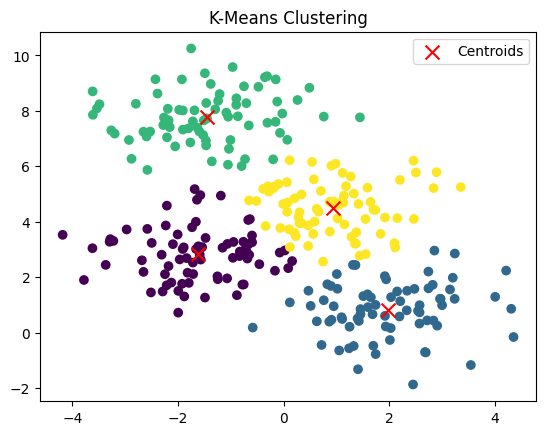

In [ ]:
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
sil_score = silhouette_score(X, labels)
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.5009


# Topic 8: Advanced Topics in Machine Learning (Optional)

## Step 2: Hands-On with Convolutional Neural Networks (CNNs)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 20568055.10it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 572426.23it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5183898.93it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 6796478.33it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)  # Flatten the tensor
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader):.4f}')


Epoch 1/5, Loss: 0.1550
Epoch 2/5, Loss: 0.0451
Epoch 3/5, Loss: 0.0311
Epoch 4/5, Loss: 0.0224
Epoch 5/5, Loss: 0.0168


In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on the test set: {accuracy:.2f}%')


Accuracy on the test set: 98.93%


# Topic 9: Model Evaluation and Validation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = load_iris()
X = data.data
y = data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import numpy as np

# Predict on test set
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification Report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# ROC Curve and AUC (for binary classification)
# Note: For multiclass, you would use One-vs-Rest strategy or a similar approach
# Since Iris is multiclass, we won’t calculate ROC AUC here, but for binary:
# y_score = model.predict_proba(X_test)[:, 1]
# roc_auc = roc_auc_score(y_test, y_score)
# print(f'ROC AUC: {roc_auc:.4f}')


Accuracy: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.model_selection import cross_val_score

# Example with K-Nearest Neighbors (KNN) classifier
#from sklearn.neighbors import KNeighborsClassifier

##model = KNeighborsClassifier()
scores = cross_val_score(model, X, y, cv=5)
print(f'Mean accuracy: {scores.mean():.4f}')


Mean accuracy: 0.9667


## Techniques for Hyperparameter Tuning

### 1. Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the model
model = KNeighborsClassifier()

# Define the grid of hyperparameters to search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.4f}')



Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Best Accuracy: 0.9583


### 2. Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

# Define the model
model = RandomForestClassifier()

# Define the hyperparameter distribution
param_dist = {
    'n_estimators': randint(10, 200),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11)
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f'Best Hyperparameters: {random_search.best_params_}')
print(f'Best Accuracy: {random_search.best_score_:.4f}')


Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 198}
Best Accuracy: 0.9583


## Implementing Hyperparameter Tuning with an Example

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
data = load_iris()
X = data.data
y = data.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the model
model = SVC()

# Define the grid of hyperparameters to search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Set up GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best Accuracy: {grid_search.best_score_:.4f}')


Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.9583


In [ ]:
# Evaluate on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f'Test Accuracy: {test_accuracy:.4f}')


Test Accuracy: 0.9667


## Implementing L1/L2 Regularization in Linear Models

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge:.4f}')


Ridge Regression MSE: 0.5559


In [ ]:
from sklearn.linear_model import Lasso

# Train a Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso:.4f}')


Lasso Regression MSE: 0.6796


In [ ]:
# Compare the coefficients of the two models
print("Ridge Regression Coefficients:")
print(ridge_model.coef_)

print("Lasso Regression Coefficients:")
print(lasso_model.coef_)


Ridge Regression Coefficients:
[ 0.85432679  0.12262397 -0.29421036  0.33900794 -0.00228221 -0.04083302
 -0.89616759 -0.86907074]
Lasso Regression Coefficients:
[ 0.71059779  0.1064527  -0.          0.         -0.         -0.
 -0.01146856 -0.        ]


In [ ]:
# Experiment with different alpha values
for alpha in [0.01, 0.1, 1.0, 10.0]:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    y_pred_ridge = ridge_model.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    print(f'Ridge Regression (alpha={alpha}) MSE: {mse_ridge:.4f}')

    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    y_pred_lasso = lasso_model.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    print(f'Lasso Regression (alpha={alpha}) MSE: {mse_lasso:.4f}')


Ridge Regression (alpha=0.01) MSE: 0.5559
Lasso Regression (alpha=0.01) MSE: 0.5483
Ridge Regression (alpha=0.1) MSE: 0.5559
Lasso Regression (alpha=0.1) MSE: 0.6796
Ridge Regression (alpha=1.0) MSE: 0.5559
Lasso Regression (alpha=1.0) MSE: 1.3107
Ridge Regression (alpha=10.0) MSE: 0.5555
Lasso Regression (alpha=10.0) MSE: 1.3107


## Implement ElasticNet Regression

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error

# Define the ElasticNetCV model
elastic_cv = ElasticNetCV(cv=5, random_state=42, alphas=[0.1, 1.0, 10.0], l1_ratio=[0.2, 0.5, 0.8])

# Fit the model
elastic_cv.fit(X_train, y_train)

# Predict on the test set
y_pred_elastic_cv = elastic_cv.predict(X_test)

# Calculate and print the Mean Squared Error (MSE)
mse_elastic_cv = mean_squared_error(y_test, y_pred_elastic_cv)
print(f'ElasticNetCV MSE: {mse_elastic_cv:.4f}')

# Display the best alpha and l1_ratio
print(f'Best alpha: {elastic_cv.alpha_}')
print(f'Best l1_ratio: {elastic_cv.l1_ratio_}')


ElasticNetCV MSE: 0.6013
Best alpha: 0.1
Best l1_ratio: 0.2


In [ ]:
print("ElasticNetCV Coefficients:")
print(elastic_cv.coef_)


ElasticNetCV Coefficients:
[ 0.70996678  0.14753506 -0.          0.01376913  0.         -0.02003421
 -0.34064906 -0.2978102 ]


In [ ]:
elastic_cv = ElasticNetCV(cv=5, random_state=42, alphas=np.logspace(-3, 2, 50), l1_ratio=np.linspace(0.1, 1.0, 10))
elastic_cv.fit(X_train, y_train)
y_pred_elastic_cv = elastic_cv.predict(X_test)
mse_elastic_cv = mean_squared_error(y_test, y_pred_elastic_cv)
print(f'ElasticNetCV MSE: {mse_elastic_cv:.4f}')
print(f'Best alpha: {elastic_cv.alpha_}')
print(f'Best l1_ratio: {elastic_cv.l1_ratio_}')


ElasticNetCV MSE: 0.5545
Best alpha: 0.001
Best l1_ratio: 1.0
